In [1]:
import tensorflow as tf
import os
import random
import numpy as np
from tqdm import tqdm
import cv2

In [2]:
from skimage.io import imread, imshow
from skimage.transform import resize
import matplotlib.pyplot as plt

seed generate same sequence of random numbers every time a code is run
helpful when random numbers that are repeatable and predictable are to be generated

In [3]:
seed = 42 
#function in numpy library
np.random.seed = seed #this is done to keep the results in sync, otherwise random seed values are generated.

In [27]:
IMG_WIDTH = 128
IMG_HEIGHT = 128
IMG_CHANNELS = 3

In [5]:
from google.colab import drive

In [6]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_path = '/content/drive/MyDrive/Colab Notebooks/training'
test_path = '/content/drive/MyDrive/Colab Notebooks/test'

In [ ]:
train_path_AD = '/content/drive/MyDrive/Colab Notebooks/training/AD'
train_path_CN = '/content/drive/MyDrive/Colab Notebooks/training/CN'

In [7]:
train_path_ADflat = '/content/drive/MyDrive/Colab Notebooks/training/AD_FLAT'
train_path_CNflat = '/content/drive/MyDrive/Colab Notebooks/training/CN_FLAT'

In [ ]:
train_path_ADflat

'/content/drive/MyDrive/Colab Notebooks/training/AD_FLAT'

In [ ]:
# next(os.walk(train_path_CNflat))[2] #dirpath,dirname,filename -> array elements

In [8]:
train_id = []
# train_id = train_id + next(os.walk(train_path_ADflat))[2]+ next(os.walk(train_path_CNflat))[2]
for k in next(os.walk(train_path_ADflat))[2]:
  pth = train_path_ADflat +'/'+ k
  # print(pth)
  # pth_id = next(os.walk(pth))[2]
  # print(pth_id)
  train_id.append(pth)
  # print(train_id)

for k in next(os.walk(train_path_CNflat))[2]:
  pth = train_path_CNflat +'/'+ k
  # print(pth)
#   # pth_id = next(os.walk(pth))[2]
#   # print(pth_id)
  train_id.append(pth)
  # print(train_id)


In [ ]:
type(train_id)

list

In [9]:
X_train =  np.zeros((len(train_id), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_train = np.zeros((len(train_id), IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)
# Y_train = np.zeros((len(train_id),1), dtype=bool)


In [30]:
Y_train.shape

(4744, 128, 128, 1)

In [ ]:

type(Y_train)

numpy.ndarray

In [ ]:
print('resising training images')

resising training images


In [ ]:
# for n, id in enumerate(train_id):
#   pth = train_path +'/'+ id
#   # print(pth)
#   files = os.listdir(pth)
#   # print(files)
#   for j in files:
#     pth2 = pth + '/' + j
#     # print(pth2)
#     # img = os.listdir(pth2)
#     # print(img)
#     for k in os.listdir(pth2):
#       # print(pth2 + '/' + k )
#       img = cv2.imread(pth2 + '/' + k )
#       # print(img)
#       img = resize(img,(IMG_HEIGHT, IMG_WIDTH), mode = 'constant', preserve_range = True)
#       X_train[n] = img
#       # print(X_train)
#       Y_train[n] = classes[id]
#       # print(Y_train)

In [10]:
classes = {'AD':0, 'CN':1}
classes['AD']

0

In [11]:

for n, id in enumerate(train_id):
  
      img = cv2.imread(id )
      # print(img)
      img = resize(img,(IMG_HEIGHT, IMG_WIDTH), mode = 'constant', preserve_range = True)
      X_train[n] = img
      # print(X_train)
      if(id.find('AD') != -1):
        Y_train[n] = classes['AD']
      elif(id.find('CN') != -1):
        Y_train[n] = classes['CN']

  
      # Y_train[n] = classes[id]
      # print(Y_train) 

In [33]:
# Y_train

In [ ]:
Y_train.shape

(4744, 128, 128, 1)

In [ ]:
# Y_train = Y_train.reshape(Y_train.shape[0],128,128,3)

In [ ]:
# from tensorflow.keras.utils import to_categorical
# Y_train = to_categorical(Y_train, 128,3)


In [ ]:
X_train.shape

(4744, 128, 128, 3)

In [ ]:
type(X_train)

numpy.ndarray

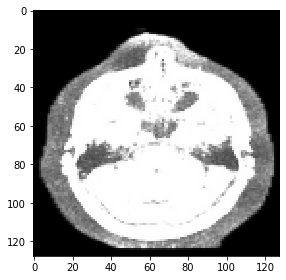

In [12]:
image_x = random.randint(0, len(train_id))
imshow(X_train[image_x])
plt.show()
# imshow(np.squeeze(Y_train[image_x]))
# plt.show()


In [13]:
#Build the model
inputs = tf.keras.layers.Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
s = tf.keras.layers.Lambda(lambda x: x / 255)(inputs)

In [14]:
#Contraction path
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
c1 = tf.keras.layers.Dropout(0.1)(c1)
c1 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
p1 = tf.keras.layers.MaxPooling2D((2, 2))(c1)

In [15]:
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
c2 = tf.keras.layers.Dropout(0.1)(c2)
c2 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
p2 = tf.keras.layers.MaxPooling2D((2, 2))(c2)

In [16]:
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
c3 = tf.keras.layers.Dropout(0.2)(c3)
c3 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
p3 = tf.keras.layers.MaxPooling2D((2, 2))(c3)

In [17]:
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
c4 = tf.keras.layers.Dropout(0.2)(c4)
c4 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
p4 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(c4)

In [18]:
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
c5 = tf.keras.layers.Dropout(0.3)(c5)
c5 = tf.keras.layers.Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)

In [19]:
#Expansive path 
u6 = tf.keras.layers.Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
u6 = tf.keras.layers.concatenate([u6, c4])
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
c6 = tf.keras.layers.Dropout(0.2)(c6)
c6 = tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)

In [20]:
u7 = tf.keras.layers.Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
u7 = tf.keras.layers.concatenate([u7, c3])
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
c7 = tf.keras.layers.Dropout(0.2)(c7)
c7 = tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)

In [21]:

u8 = tf.keras.layers.Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
u8 = tf.keras.layers.concatenate([u8, c2])
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
c8 = tf.keras.layers.Dropout(0.1)(c8)
c8 = tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

In [22]:
u9 = tf.keras.layers.Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
u9 = tf.keras.layers.concatenate([u9, c1], axis=3)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
c9 = tf.keras.layers.Dropout(0.1)(c9)
c9 = tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)

In [23]:
outputs = tf.keras.layers.Conv2D(1, (1, 1), activation='sigmoid')(c9)

In [24]:
model = tf.keras.Model(inputs=[inputs], outputs=[outputs])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 lambda (Lambda)                (None, 128, 128, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv2d (Conv2D)                (None, 128, 128, 16  448         ['lambda[0][0]']                 
                                )                                                                 
                                                                                              

Callbacks are utilites called at certain point during model training
for say stopping the epochs a certain stage if improvements are not visible


In [26]:
#Modelcheckpoint: chechks the result at every epoch and save the same in case of any discripancy later
checkpointer = tf.keras.callbacks.ModelCheckpoint('model_for_alzheimer.h5', verbose=1, save_best_only=True)

#EarlyStopping and TensorBoard are types of callbacks mentioned in tensorflow documentation
callbacks = [
        tf.keras.callbacks.EarlyStopping(patience=2, monitor='val_loss'),
        tf.keras.callbacks.TensorBoard(log_dir='logs')]

results = model.fit(X_train, Y_train, validation_split=0.1, batch_size=16, epochs=25, callbacks=callbacks)
# results = model.fit(X_train, Y_train, batch_size=16, epochs=25, callbacks=callbacks)

Epoch 1/25
267/267 [==============================] - 842s 3s/step - loss: 0.6940 - accuracy: 0.5278 - val_loss: 0.7092 - val_accuracy: 0.4077
Epoch 2/25
267/267 [==============================] - 858s 3s/step - loss: 0.6764 - accuracy: 0.5579 - val_loss: 0.7236 - val_accuracy: 0.4010
Epoch 3/25
267/267 [==============================] - 897s 3s/step - loss: 0.6882 - accuracy: 0.5803 - val_loss: 0.7248 - val_accuracy: 0.4084


<function matplotlib.pyplot.show(close=None, block=None)>

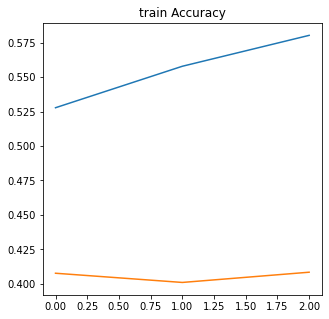

In [28]:
plt.figure(figsize=(5,5))
plt.plot(results.history['accuracy'],label='train acc')
plt.plot(results.history['val_accuracy'],label='val acc')
plt.legend
plt.title('train Accuracy')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

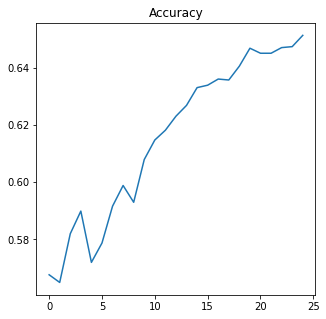

In [ ]:
#visualisation
plt.figure(figsize=(5,5))
plt.plot(results.history['accuracy'],label='train acc')
# plt.plot(results.history['val_accuracy'],label='val acc')
plt.legend
plt.title('train Accuracy')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

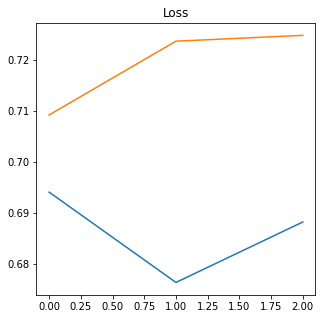

In [29]:
plt.figure(figsize=(5,5))
plt.plot(results.history['loss'],label='train loss')
# plt.plot(results.history['val_loss'],label='val loss')
plt.legend
plt.title('Loss')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

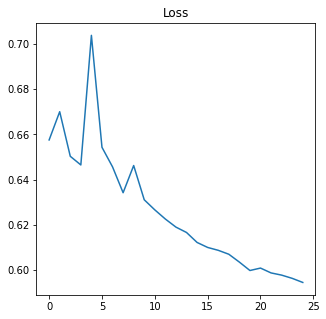

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(results.history['loss'],label='train loss')
plt.plot(results.history['val_loss'],label='val loss')
plt.legend
plt.title('Loss')
plt.show

In [ ]:
test_path_ADflat = '/content/drive/MyDrive/Colab Notebooks/test/test_AD_FLAT'
test_path_CNflat = '/content/drive/MyDrive/Colab Notebooks/test/test_CN_FLAT'

In [ ]:
test_id = []
# train_id = train_id + next(os.walk(train_path_ADflat))[2]+ next(os.walk(train_path_CNflat))[2]
for k in next(os.walk(test_path_ADflat))[2]:
  pth = test_path_ADflat +'/'+ k
  # print(pth)
  # pth_id = next(os.walk(pth))[2]
  # print(pth_id)
  test_id.append(pth)
  # print(train_id)

for k in next(os.walk(test_path_CNflat))[2]:
  pth = test_path_CNflat +'/'+ k
  # print(pth)
#   # pth_id = next(os.walk(pth))[2]
#   # print(pth_id)
  test_id.append(pth)
  # print(train_id)


In [ ]:
#testing data:
X_test =  np.zeros((len(test_id), IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS), dtype=np.uint8)
Y_test = np.zeros((len(test_id), IMG_HEIGHT, IMG_WIDTH, 1), dtype=bool)

In [ ]:
for n, id in enumerate(test_id):
  
      img = cv2.imread(id )
      # print(img)
      img = resize(img,(IMG_HEIGHT, IMG_WIDTH), mode = 'constant', preserve_range = True)
      X_test[n] = img
      # print(X_train)
      if(id.find('AD') != -1):
        Y_test[n] = classes['AD']
      elif(id.find('CN') != -1):
        Y_test[n] = classes['CN']

In [ ]:
X_test.shape

(0, 128, 128, 3)

In [ ]:
Y_test.shape

(0, 128, 128, 1)

In [ ]:
model.evaluate(X_test,Y_test,batch_size = 32)

/usr/local/lib/python3.9/dist-packages/keras/utils/generic_utils.py:239: RuntimeWarning: divide by zero encountered in log10
  numdigits = int(np.log10(self.target)) + 1


OverflowError: ignored